In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import warnings
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

warnings.filterwarnings('ignore')


In [ ]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']

In [ ]:
train = pd.read_csv("/content/twitter_training.csv",names=col_names)
train.sample(5)

,ID,Entity,Sentiment,Content
45645,11835,Verizon,Negative,@Verizon Internet service has redirected their...
28078,433,ApexLegends,Negative,NaN
5152,86,Amazon,Neutral,Code No. 2020 - 04 - 06 07... 01 : 21 21 : 43E...
64902,7917,MaddenNFL,Negative,@EAMaddenNFL fix your servers please my goodne...
32358,7552,LeagueOfLegends,Negative,RIOT YOU COWARDS JUST MAKE EVERYONE A JUNGLER ...


In [ ]:
test = pd.read_csv("/content/twitter_validation.csv",names=col_names)
test.sample(5)

,ID,Entity,Sentiment,Content
532,8998,Nvidia,Irrelevant,This is really interesting for indie RPGs with...
477,12541,WorldOfCraft,Positive,Absolutely love this! Thank you so much for su...
732,10748,RedDeadRedemption(RDR),Neutral,Red Dead Redemption 2\n@RockstarGames\n#RDR2 #...
719,18,Amazon,Positive,Amazon Best Sellers: Best Sports Collectibles ...
488,9697,PlayStation5(PS5),Negative,Smh


In [ ]:
train.shape

(74682, 4)

In [ ]:
#data processing

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
#for checking null values
train.isnull().sum()


ID             0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [ ]:
train.dropna(subset=['Content'], inplace=True)

In [ ]:
#for checking duplicate values
train.duplicated().sum()

2340

In [ ]:
# replacing irrelavant with neutral
train['Sentiment'] = train['Sentiment'].replace('Irrelevant', 'Neutral')
test['Sentiment'] = test['Sentiment'].replace('Irrelevant', 'Neutral')

In [ ]:
train.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
train.duplicated().sum()

2340

In [ ]:
# dropping duplicates
train = train.drop_duplicates(keep='first')

In [ ]:
train.duplicated().sum()

0

In [ ]:
train.shape

(71656, 4)

In [ ]:
train['Sentiment'].value_counts()

Neutral     30245
Negative    21698
Positive    19713
Name: Sentiment, dtype: int64

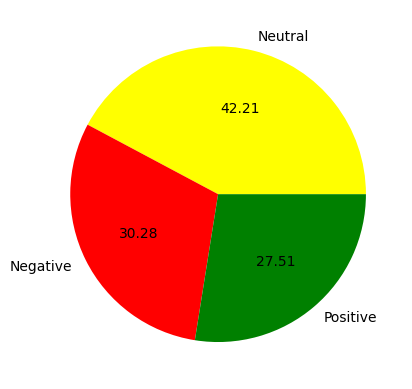

In [ ]:
plt.pie(train['Sentiment'].value_counts(), labels=['Neutral','Negative','Positive'],autopct='%0.2f',colors=['yellow','red','green'])
plt.show()

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
train['num_char'] = train['Content'].apply(len)

In [ ]:
train.head()

,ID,Entity,Sentiment,Content,num_char
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57


In [ ]:
train['num_words'] = train['Content'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
train.head()

,ID,Entity,Sentiment,Content,num_char,num_words
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53,11
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,13
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,11
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,11
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,13


In [ ]:
train['num_sentences'] = train['Content'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
train.head()

,ID,Entity,Sentiment,Content,num_char,num_words,num_sentences
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53,11,1
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,13,1
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,11,1
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,11,1
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,13,1


In [ ]:
train[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,71656.000000,71656.000000,71656.000000
mean,110.538127,22.972535,1.954491
std,79.409848,17.163287,1.638269
min,1.000000,0.000000,0.000000
25%,49.000000,10.000000,1.000000
50%,93.000000,19.000000,1.000000
75%,155.000000,32.000000,2.000000
max,957.000000,198.000000,33.000000


<Axes: xlabel='num_char', ylabel='Count'>

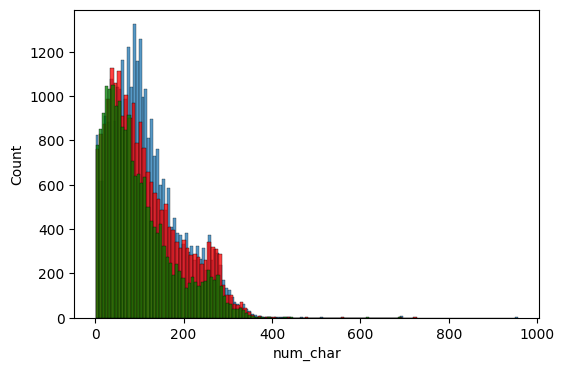

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(train[train['Sentiment'] == 'Neutral']['num_char'])
sns.histplot(train[train['Sentiment'] == 'Negative']['num_char'], color='red')
sns.histplot(train[train['Sentiment'] == 'Positive']['num_char'], color='green')

<Axes: xlabel='num_words', ylabel='Count'>

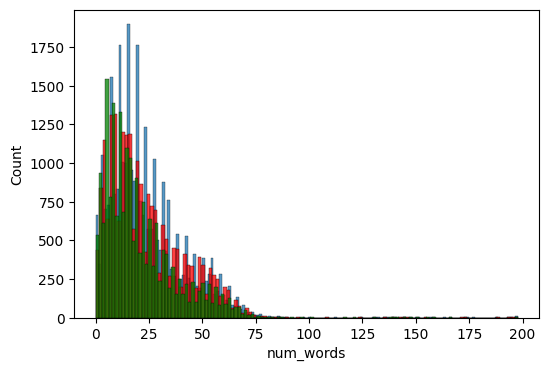

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(train[train['Sentiment'] == 'Neutral']['num_words'])
sns.histplot(train[train['Sentiment'] == 'Negative']['num_words'], color='red')
sns.histplot(train[train['Sentiment'] == 'Positive']['num_words'], color='green')

In [ ]:
df=train.drop(['ID','Entity'],axis=1)

In [ ]:
df.head()

,Sentiment,Content,num_char,num_words,num_sentences
0,Positive,im getting on borderlands and i will murder yo...,53,11,1
1,Positive,I am coming to the borders and I will kill you...,51,13,1
2,Positive,im getting on borderlands and i will kill you ...,50,11,1
3,Positive,im coming on borderlands and i will murder you...,51,11,1
4,Positive,im getting on borderlands 2 and i will murder ...,57,13,1


In [ ]:
df_encoded = pd.get_dummies(df, columns=['Sentiment'],drop_first=True)
df_encoded['Sentiment_Neutral'] = df_encoded['Sentiment_Neutral'].astype(int)
df_encoded['Sentiment_Positive'] = df_encoded['Sentiment_Positive'].astype(int)

In [ ]:
df_encoded=df_encoded.drop(['Content'],axis=1)

<Axes: >

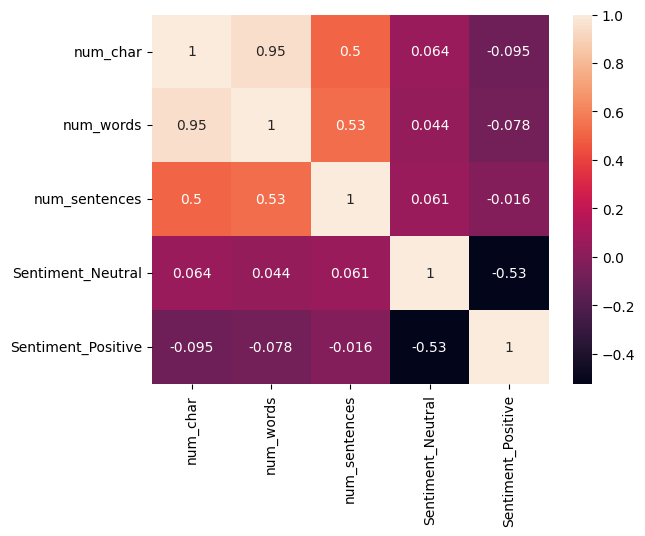

In [ ]:
sns.heatmap(df_encoded.corr(),annot=True)

In [ ]:
from nltk.corpus import stopwords
import string # for punctuation
# string.punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:] # list is mutable, so you have to do cloning, else if you clear y, text gets cleared too
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['Sentiment'])

In [ ]:
df.head()

,Sentiment,Content,num_char,num_words,num_sentences,sentiment_encoded
0,Positive,im getting on borderlands and i will murder yo...,53,11,1,2
1,Positive,I am coming to the borders and I will kill you...,51,13,1,2
2,Positive,im getting on borderlands and i will kill you ...,50,11,1,2
3,Positive,im coming on borderlands and i will murder you...,51,11,1,2
4,Positive,im getting on borderlands 2 and i will murder ...,57,13,1,2


In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='black')